In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

#metrics
from statistics import mean
from sklearn.metrics import accuracy_score as score
from sklearn.metrics import explained_variance_score as evs
from sklearn.metrics import f1_score

from time import time

#Ignore Warning 
import warnings as wrn
wrn.filterwarnings('ignore')

In [4]:
import pandas as pd
db = pd.read_csv('cardio_train.csv',sep=';')

In [5]:
db.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [6]:
db.shape

(69301, 13)

In [7]:
db.columns.value_counts().sum()

13

In [8]:
db.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [9]:
db.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

# Data Exploration

In [12]:
db.drop('id',axis =1,inplace= True)

In [13]:
db_numerics_only = db.select_dtypes(include=np.number)

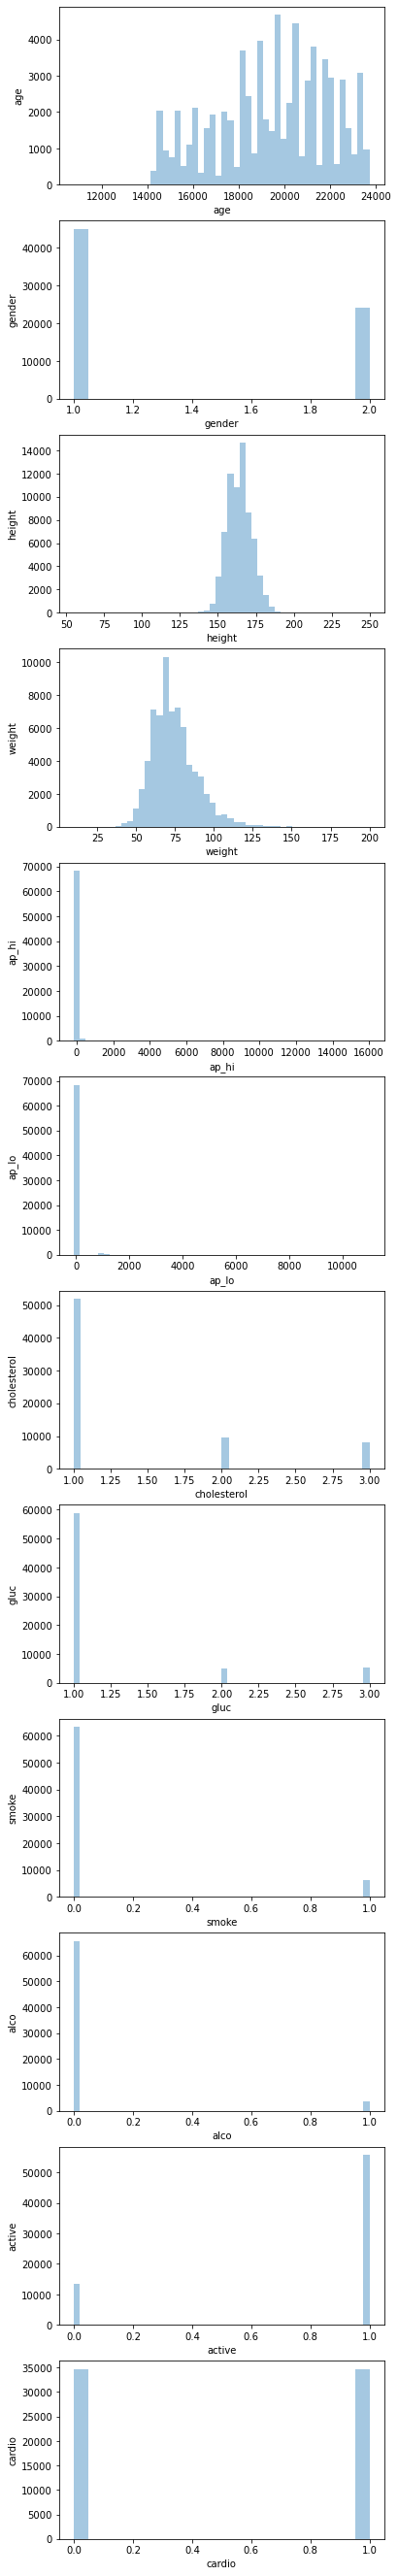

In [14]:
n=len(db_numerics_only.columns)
fig,ax = plt.subplots(n,1, figsize=(6,n*4))
#fig, ax = plt.subplots(n,1,2,figsize=(20,n*5))
for i in range(n):
    plt.sca(ax[i])
    col = db_numerics_only.columns[i]
    sns.distplot(db_numerics_only[col].dropna(),kde=False)
    plt.ylabel(col)

Text(0.5, 0, 'cube_root-ages')

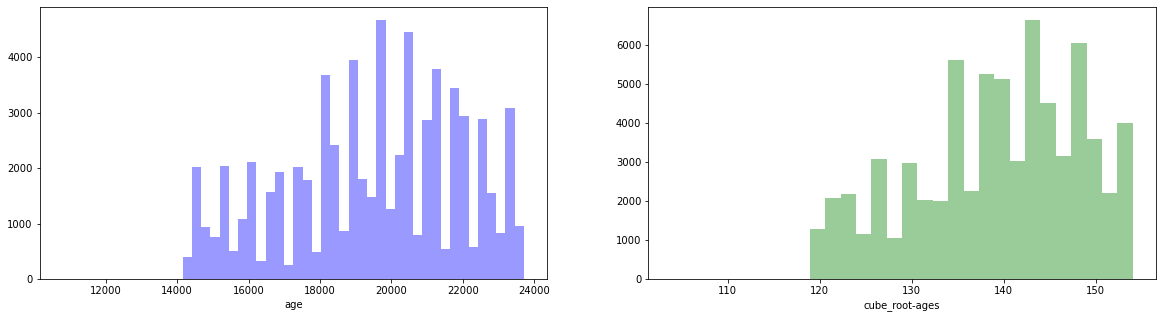

In [16]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(db.age, ax=ax[0], kde=False, color="blue")
sns.distplot(np.sqrt(db.age), ax=ax[1], bins=30, color="green", kde=False)
ax[1].set_xlabel("cube_root-ages")

In [17]:
# DO: Calculate number of students
total_patients = db.shape[0]

# DO: Calculate number of features
all_features =db.columns.value_counts().sum()

# DO: Calculate passing students
# Data filtering using .loc[rows, columns]
total_pass = db.loc[db.cardio == 1, 'cardio']
n_pos = total_pass.shape[0]

# TODO: Calculate failing students
total_fail= db.loc[db.cardio == 0, 'cardio']
n_neg= total_fail.shape[0]

# TODO: Calculate graduation rate
total = float(n_pos+ n_neg)
positive_rate = float(n_pos * 100 / total)


In [18]:
# Print the results
print ("Total number of students: {}".format(total_patients))
print( "Number of features: {}".format(all_features))
print ("Number of students who passed: {}".format(n_pos))
print ("Number of students who failed: {}".format(n_neg))
print( "Graduation rate of the class: {:.2f}%".format(positive_rate))

Total number of students: 69301
Number of features: 12
Number of students who passed: 34622
Number of students who failed: 34679
Graduation rate of the class: 49.96%


<Figure size 720x720 with 0 Axes>

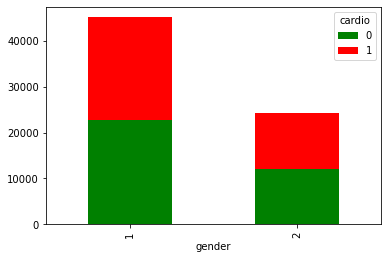

In [19]:
plt.figure(figsize=(10,10))
dfq = pd.crosstab(db['gender'],db['cardio'])
dfq.plot(kind='bar', stacked= True ,color =['green','red'],grid=False)

<Figure size 720x720 with 0 Axes>

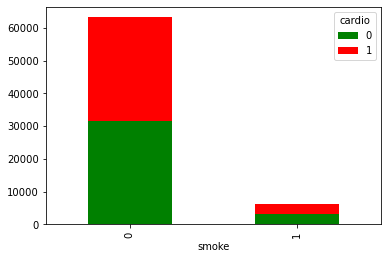

In [20]:
plt.figure(figsize=(10,10))
dfq = pd.crosstab(db['smoke'],db['cardio'])
dfq.plot(kind='bar', stacked= True ,color =['green','red'],grid=False)

<Figure size 720x720 with 0 Axes>

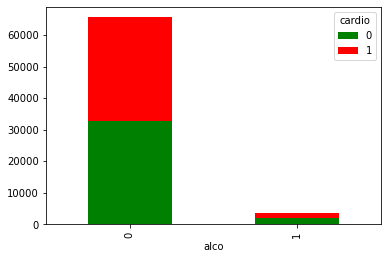

In [21]:
plt.figure(figsize=(10,10))
dfq = pd.crosstab(db['alco'],db['cardio'])
dfq.plot(kind='bar', stacked= True ,color = ['green','red'],grid=False)

## Data Preprocessing

### remove skewness from dataset by using feature transformation

In [22]:
X=db.drop('cardio',axis=1)
y=db['cardio']

### standardization

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

### Training and Testing Data Split

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.25, random_state=45)

In [29]:
# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 51975 samples.
Testing set has 17326 samples.


## Models evaluation

In [30]:
def train_classifiers(clf, X_train, y_train):
    ''' Fit a classifier to the training data. '''

    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()

    # Print the results
    print ("Trained model in {:.4f} seconds".format(end - start))


def predict_label(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''

    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()

    # Print and return results
    print ("Made predictions in {:.4f} seconds".format(end - start))
    return f1_score(target.values, y_pred, pos_label= 1)


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''

    # Indicate the classifier and the training set size
    print ("")
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))

    # Train the classifier
    train_classifiers(clf, X_train, y_train)

    # Print the results of prediction for both training and testing
    print ("F1 score for training set: {:.4f}.".format(predict_label(clf, X_train, y_train)))
    print ("F1 score for test set: {:.4f}.".format(predict_label(clf, X_test, y_test)))

## Implementation: Model Performance

In [31]:
##Import the three supervised learning models from sklearn

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# DO: Initialize the three models

clf_1 = GaussianNB()
clf_2 = LogisticRegression(random_state=42)
clf_3 = SVC(random_state=42)
clf_4 = DecisionTreeClassifier()
clf_5 = RandomForestClassifier(n_estimators=1000, n_jobs=-1, )

# DO: Set up the training set sizes

X_train_100 = X_train.iloc[:100, :]
y_train_100 = y_train.iloc[:100]

X_train_200 = X_train.iloc[:200, :]
y_train_200 = y_train.iloc[:200]

X_train_300 = X_train.iloc[:300, :]
y_train_300 = y_train.iloc[:300]

# DO: Execute the 'train_predict' function for each classifier and each training set size

for clf in [clf_1, clf_2, clf_3, clf_4, clf_5]:
    print ("\n{}: \n".format(clf.__class__.__name__))
    for n in [100, 200, 300]:
        train_predict(clf, X_train[:n], y_train[:n], X_test, y_test)


GaussianNB: 


Training a GaussianNB using a training set size of 100. . .
Trained model in 0.0060 seconds
Made predictions in 0.0050 seconds
F1 score for training set: 0.6731.
Made predictions in 0.0668 seconds
F1 score for test set: 0.5386.

Training a GaussianNB using a training set size of 200. . .
Trained model in 0.0040 seconds
Made predictions in 0.0020 seconds
F1 score for training set: 0.4615.
Made predictions in 0.0150 seconds
F1 score for test set: 0.4664.

Training a GaussianNB using a training set size of 300. . .
Trained model in 0.0030 seconds
Made predictions in 0.0020 seconds
F1 score for training set: 0.4488.
Made predictions in 0.0130 seconds
F1 score for test set: 0.4903.

LogisticRegression: 


Training a LogisticRegression using a training set size of 100. . .
Trained model in 0.0758 seconds
Made predictions in 0.0020 seconds
F1 score for training set: 0.8029.
Made predictions in 0.0100 seconds
F1 score for test set: 0.7081.

Training a LogisticRegression using a

## find best parametrers using gridsearhCV and also check and remove overfitting and underfitting problem by using hyperparameter tuning

In [32]:
def Snippet(model, X_test, y_test,X_train,y_train,parameters): 
    
    print(format('How to find parameters using GridSearchCV  for Regression','*^82'))    
    
    import warnings
    warnings.filterwarnings("ignore")
    
    # load libraries
    #from sklearn import datasets
    #from sklearn.model_selection import train_test_split
    from sklearn.metrics import classification_report
    from sklearn.model_selection import GridSearchCV
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.metrics.classification import accuracy_score
    from sklearn.metrics.classification import confusion_matrix
    #print(model,parameters)
    

    grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2,refit=True,scoring='f1', n_jobs=-1)
    grid.fit(X_train, y_train)   
    
    y_pred = grid.best_estimator_.predict(X_test)
    train_y_pred = grid.best_estimator_.predict(X_train)
    test_acc = accuracy_score(y_test, y_pred)
    train_acc = accuracy_score(y_train, train_y_pred)
    test_conf = confusion_matrix (y_test, y_pred)
    train_conf = confusion_matrix (y_train, train_y_pred)
    
    class_report = classification_report(y_test,y_pred)
    y_pred_prob = grid.best_estimator_.predict_proba(X_test)[:,1]
    plt.hist(y_pred_prob,bins=10)
    plt.xlim(0,1)
    plt.xlabel("Predicted Proababilities")
    plt.ylabel("Frequency")
   
    # Results from Grid Search
    print("\n========================================================")
    print(" Results from Grid Search " )
    print("========================================================")    
    
    print("\n The best estimator across ALL searched params:\n",
          grid.best_estimator_)
    
    print("\n The best score across ALL searched params:\n",
          grid.best_score_)
    
    print("\n The best parameters across ALL searched params:\n",
          grid.best_params_)
                                    
    print("\n The train_accuracy across ALL models:\n",
          train_acc)
                                    
    print("\n The test_accuracy across ALL models:\n",
          test_acc) 
    print("\n The train_confusion matrix across ALL models:\n",
          train_conf) 
    print("\n The test_confusion matrix across ALL models:\n",
          test_conf) 
    
    print("\n classification report across ALL models:\n",
          class_report) 
    
    print (plt.show())
    
    print("\n ========================================================")

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.2, verbosity=1)

 The best score across ALL searched params:
 0.7241253988122871

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.2}

 The train_accuracy across ALL models:
 0.7374891774891775

 The test_accuracy across ALL models:
 0.7380814960175459

 The train_confusion matrix across ALL models:
 [[2

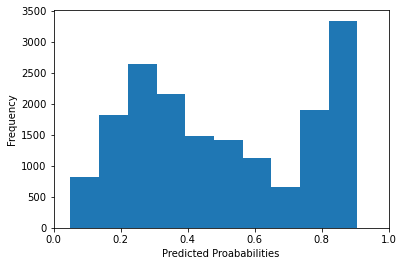

None

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.03, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.2, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

 The best score across ALL searched params:
 0.7245555684155096

 The best parameters across ALL searched params:
 {'learning_rate': 0

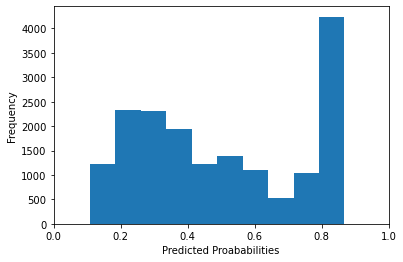

None

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.7184972360571967

 The best parameters across ALL searched params:
 {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_split': 3}

 The train_accuracy across ALL models:
 0.7422029822029822

 The test_accuracy across ALL models:
 0.736696

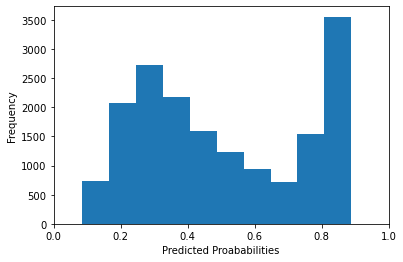

None

************How to find parameters using GridSearchCV  for Regression*************


In [ ]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
alg = [XGBClassifier(),GradientBoostingClassifier(), RandomForestClassifier(),SVC(probability=True)]
parameters = [{'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]},
              
              {'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]},
              
              { 'max_depth'    : [4,6,8],
                  'min_samples_split' : [2,3,4],
                  'max_features'    : ['auto','sqrt','log2']},
              
              {'kernel':['linear', 'rbf'], 
                'C':[1, 10]}
             ]


for i in range(len(alg)):
    #print(alg[i])
                              
    Snippet(alg[i] ,X_test, y_test,X_train,y_train,parameters[i])

### bar plot of features importances

In [ ]:
model = GradientBoostingClassifier()
model.fit(X_train,y_train)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances = feat_importances.nlargest(15)
feat_importances.plot(kind='barh')